### Importing Libraries 

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import operator
import matplotlib.pyplot as plt
from statistics import variance
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA, FastICA
from sklearn.model_selection import train_test_split
from sklearn.decomposition import TruncatedSVD
from sklearn.random_projection import GaussianRandomProjection
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.metrics import r2_score
from prettytable import PrettyTable
from joblib import Parallel, delayed
import joblib


import warnings
warnings.filterwarnings("ignore")

### Data Loading after EDA 

In [2]:
train = pd.read_csv('final_train.csv').drop(columns = ['Unnamed: 0'])
test = pd.read_csv('final_test.csv').drop(columns = ['Unnamed: 0'])

In [12]:
print(train.shape)
print(test.shape)

(4201, 167)
(4209, 166)


In [3]:
train.head()

,ID,y,X0,X1,X2,X3,X5,X6,X8,X12,...,X359,X361,X362,X363,X367,X368,X374,X375,X376,X377
0,0,130.81,k,v,at,a,u,j,o,0,...,0,1,0,0,0,0,0,0,0,1
1,6,88.53,k,t,av,e,y,l,o,0,...,0,1,0,1,0,0,0,1,0,0
2,7,76.26,az,w,n,c,x,j,x,0,...,0,1,0,1,0,0,0,0,0,0
3,9,80.62,az,t,n,f,x,l,e,0,...,0,1,0,1,0,0,0,0,0,0
4,13,78.02,az,v,n,f,h,d,n,0,...,0,1,0,1,0,0,0,0,0,0


### Encoding for Categorical Variables

In [4]:
def encoding_categorical(data):
    
    le = LabelEncoder()
    data_le = le.fit_transform(data)
    
    return data_le

In [5]:
categorical_features = ['X0', 'X1', 'X2', 'X3', 'X5', 'X6', 'X8']

In [6]:
catg_train = train[categorical_features]
catg_test = test[categorical_features]

In [7]:
train_catg_encoded = pd.DataFrame()

for feature in categorical_features:
    train_catg_encoded[feature] = encoding_categorical(catg_train[feature])   

In [8]:
test_catg_encoded = pd.DataFrame()

for feature in categorical_features:
    test_catg_encoded[feature] = encoding_categorical(catg_test[feature]) 

In [9]:
train_catg_encoded.head()

,X0,X1,X2,X3,X5,X6,X8
0,32,23,17,0,24,9,14
1,32,21,19,4,28,11,14
2,20,24,34,2,27,9,23
3,20,21,34,5,27,11,4
4,20,23,34,5,12,3,13


### PCA for Binary Features 

In [19]:
train_binary = train.drop(columns = ['X0', 'X1', 'X2', 'X3', 'X5', 'X6', 'X8', 'ID', 'y'])
test_binary = test.drop(columns = ['X0', 'X1', 'X2', 'X3', 'X5', 'X6', 'X8', 'ID'])

In [20]:
pca = PCA()
pca.fit(train_binary)

pca_train_binary = pca.transform(train_binary)
pca_test_binary = pca.transform(test_binary)

print(pca_train_binary.shape)
print(pca_test_binary.shape)

(4201, 158)
(4209, 158)


In [21]:
joblib.dump(pca, 'PCA.pkl')

['PCA.pkl']

##### variance proportioon plot (PCA) 

Text(0, 0.5, 'cumulative explained variance')

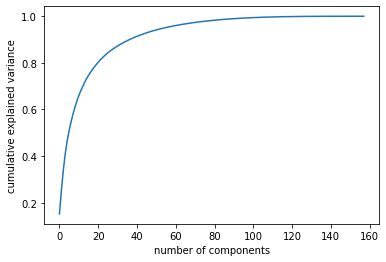

In [22]:
plt.plot(pca.explained_variance_ratio_.cumsum())
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

By seeing above plot we can say 100 components are explaining all the variance in the dataset.

In [65]:
pca_train_binary_df = pd.DataFrame (pca_train_binary)
pca_train_binary_df = pca_train_binary_df[range(0, 100)]

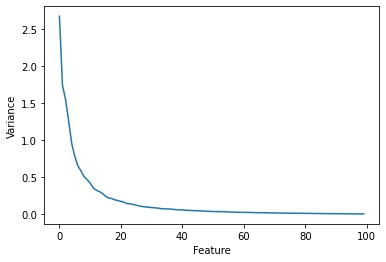

In [24]:
#pca_train_binary_df = pd.DataFrame (pca_train_binary)
pca_var = []

for feature in pca_train_binary_df.columns:
    pca_var.append(variance(pca_train_binary_df[feature]))

plt.plot(pca_train_binary_df.columns, pca_var)
plt.xlabel('Feature')
plt.ylabel('Variance')
plt.show()    

### SVD for Binary Features

In [25]:
svd = TruncatedSVD(n_components = 157)
svd.fit(train_binary)

svd_train_binary = svd.transform(train_binary)
svd_test_binary = svd.transform(test_binary)

print(svd_train_binary.shape)
print(svd_test_binary.shape)

(4201, 157)
(4209, 157)


In [26]:
joblib.dump(svd, 'SVD.pkl')

['SVD.pkl']

##### variance proportioon plot (SVD) 

Text(0, 0.5, 'cumulative explained variance')

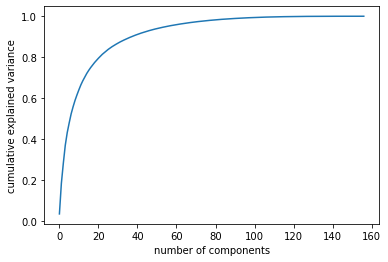

In [27]:
plt.plot(svd.explained_variance_ratio_.cumsum())
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

By seeing above plot we can say 100 components are explaining all the variance in the dataset.

In [66]:
svd_train_binary_df = pd.DataFrame (svd_train_binary)
svd_train_binary_df = svd_train_binary_df[range(0, 100)]

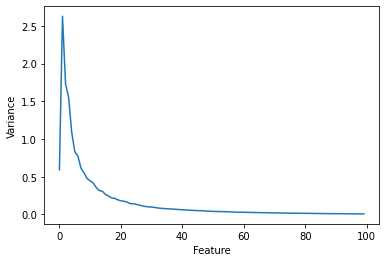

In [29]:
#svd_train_binary_df = pd.DataFrame (svd_train_binary)
svd_var = []

for feature in svd_train_binary_df.columns:
    svd_var.append(variance(svd_train_binary_df[feature]))

plt.plot(svd_train_binary_df.columns, svd_var)
plt.xlabel('Feature')
plt.ylabel('Variance')
plt.show()    

### Gausian Random Projection for Binary Features 

In [30]:
from sklearn.random_projection import johnson_lindenstrauss_min_dim

johnson_lindenstrauss_min_dim(n_samples = 4201, eps = 0.9)

206

Knowing only the number of samples, the johnson_lindenstrauss_min_dim estimates conservatively the minimal size of the random subspace to guarantee a bounded distortion introduced by the random projection.

In [31]:
grp = GaussianRandomProjection(n_components = 206, random_state = 42)

grp.fit(train_binary)

grp_train_binary = grp.transform(train_binary)
grp_test_binary = grp.transform(test_binary)
                                
print(grp_train_binary.shape)
print(grp_test_binary.shape)

(4201, 206)
(4209, 206)


In [32]:
joblib.dump(grp, 'GRP.pkl')

['GRP.pkl']

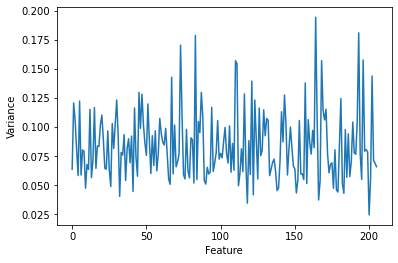

In [33]:
grp_train_binary_df = pd.DataFrame (grp_train_binary)
grp_var = []

for feature in grp_train_binary_df.columns:
    grp_var.append(variance(grp_train_binary_df[feature]))

plt.plot(grp_train_binary_df.columns, grp_var)
plt.xlabel('Feature')
plt.ylabel('Variance')
plt.show()  

### Independent component analysis for Binary Features 

In [34]:
#ica = FastICA(n_components = 10, random_state = 42)
ica = FastICA()
ica.fit(train_binary)

ica_train_binary = ica.transform(train_binary)
ica_test_binary = ica.transform(test_binary)

print(ica_train_binary.shape)
print(ica_test_binary.shape)

(4201, 158)
(4209, 158)


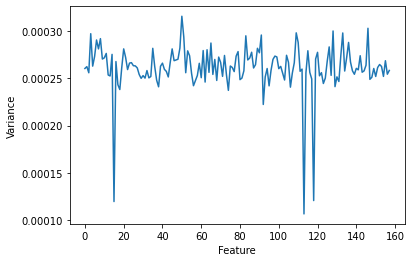

In [35]:
ica_train_binary_df = pd.DataFrame (ica_train_binary)
ica_var = []

for feature in ica_train_binary_df.columns:
    ica_var.append(variance(ica_train_binary_df[feature]))

plt.plot(ica_train_binary_df.columns, ica_var)
plt.xlabel('Feature')
plt.ylabel('Variance')
plt.show()  

### Interaction Features 

In [36]:
pf = PolynomialFeatures(interaction_only = True)
pf.fit(train_binary)

pf_train_binary = pf.transform(train_binary)
pf_test_binary = pf.transform(test_binary)

print(pf_train_binary.shape)
print(pf_test_binary.shape)

(4201, 12562)
(4209, 12562)


In [37]:
joblib.dump(pf, 'PF.pkl')

['PF.pkl']

In [38]:
pf_train_binary_df = pd.DataFrame (pf_train_binary)


In [39]:
pf_test_binary_df = pd.DataFrame (pf_test_binary)

In [40]:
#pf_var = []

#for feature in pf_train_binary_df.columns:
    #pf_var.append(variance(pf_train_binary_df[feature]))

In [41]:
#pf_ftr = list(pf_train_binary_df.columns)
#ftr_var_dict = {pf_ftr[i]: pf_var[i] for i in range(len(pf_var))}

In [42]:
#pf_ftr_var_df = pd.DataFrame()
#pf_ftr_var_df['feature'] = pf_train_binary_df.columns
#pf_ftr_var_df['variance'] = pf_var

In [43]:
#ftr_zero_var = []
#for i in range(pf_ftr_var_df.shape[0]):
  #  if pf_ftr_var_df['variance'][i] == 0:
   #     ftr_zero_var.append(pf_ftr_var_df['feature'][i]) 

In [44]:
#index_zero_var = pf_ftr_var_df.index[pf_ftr_var_df['variance'] == 0].tolist()

In [45]:
#pf_ftr_var_df_upd = pf_ftr_var_df.drop(index_zero_var, axis = 0).reset_index(drop = True)

In [46]:
#final_pf_train_binary_df = pf_train_binary_df.drop(columns = ftr_zero_var)

In [47]:
# ftr_same_var = []
# for i in range(pf_ftr_var_df_upd.shape[0]):
#     for j in range(pf_ftr_var_df_upd.shape[0]):
#         if pf_ftr_var_df_upd['feature'][i] == pf_ftr_var_df_upd['feature'][j]:
#             continue
#         elif pf_ftr_var_df_upd['variance'][i] == pf_ftr_var_df_upd['variance'][j]:
#             if pf_ftr_var_df_upd['feature'][i] not in ftr_same_var:
#                 ftr_same_var.append(pf_ftr_var_df_upd['feature'][i])
#             elif pf_ftr_var_df_upd['feature'][j] not in ftr_same_var:
#                 ftr_same_var.append(pf_ftr_var_df_upd['feature'][j])
#         else:
#             continue

In [48]:
#ftr_to_drop = ftr_zero_var + ftr_same_var

In [49]:
#final_pf_train_binary_df = pf_train_binary_df.drop(columns = ftr_to_drop)

In [50]:
#final_pf_train_binary_df.head()

In [51]:
# pf_var_new = []

# for feature in final_pf_train_binary_df.columns:
#     pf_var_new.append(variance(final_pf_train_binary_df[feature]))

In [52]:
# pf_ftr_var_df_new = pd.DataFrame()
# pf_ftr_var_df_new['feature'] = final_pf_train_binary_df.columns
# pf_ftr_var_df_new['variance'] = pf_var_new

In [53]:
#pf_ftr_var_df_new

In [54]:
# pf_ftr = list(final_pf_train_binary_df.columns)
# ftr_var_dict = {pf_ftr[i]: pf_var_new[i] for i in range(len(pf_var_new))}

In [55]:
#sorted_ftr_var_dict = dict( sorted(ftr_var_dict.items(), key=operator.itemgetter(1),reverse=True))

In [56]:
#sorted_ftr_var_dict

In [57]:
top_10_interaction_features = [12526, 6639, 4899, 3178, 2437, 2483, 6181, 2811, 6854, 4573]

final_interaction_train = pf_train_binary_df[top_10_interaction_features]
final_interaction_test = pf_test_binary_df[top_10_interaction_features]

In [58]:
joblib.dump(top_10_interaction_features, '10Interaction.pkl')

['10Interaction.pkl']

In [59]:
print(final_interaction_train.shape)
print(final_interaction_test.shape)

(4201, 10)
(4209, 10)


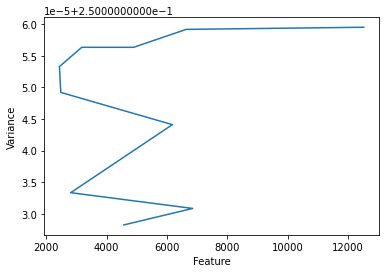

In [60]:
interaction_var = []

for feature in final_interaction_train.columns:
    interaction_var.append(variance(final_interaction_train[feature]))

plt.plot( final_interaction_train.columns, interaction_var)
plt.xlabel('Feature')
plt.ylabel('Variance')
plt.show() 

### Baseline models 

#### Label Encoded Categorical Features + Binary Features (Linear Regression) 

In [61]:
train_new = pd.concat([train_catg_encoded, train.drop(columns = ['X0', 'X1', 'X2', 'X3', 'X5', 'X6', 'X8', 'ID', 'y'])], axis = 1, join = 'inner')
#test = pd.concat([test_catg_encoded, test.drop(columns = ['X0', 'X1', 'X2', 'X3', 'X5', 'X6', 'X8', 'ID'])], axis = 1, join = 'inner')

In [62]:
test_new = pd.concat([test_catg_encoded, test.drop(columns = ['X0', 'X1', 'X2', 'X3', 'X5', 'X6', 'X8', 'ID'])], axis = 1, join = 'inner')

In [72]:
train_new.to_csv('original_train.csv', index = False)
test_new.to_csv('original_test.csv', index = False)

In [79]:
X = train_new
y = train['y']

In [80]:
y.to_csv('labels.csv', index = False)

In [36]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [38]:
lr = LinearRegression()

lr.fit(x_train, y_train)

y_pred_train = lr.predict(x_train)
y_pred_test = lr.predict(x_test)

In [39]:
r2_score(y_train, y_pred_train)

0.6263861890238347

In [40]:
r2_score(y_test, y_pred_test)

0.5523543565034339

####  Label Encoded Categorical Features + Binary Features (Decision Tree Regression)

In [42]:
depth = [1, 5, 10, 50, 100, 500, 1000]
parameters = {'max_depth' : depth}

dtr = DecisionTreeRegressor()
regressor = RandomizedSearchCV(dtr, param_distributions = parameters, verbose = 10, n_jobs = -1)
best_regressor = regressor.fit(x_train, y_train)
best_max_depth = best_regressor.best_estimator_.get_params()

regressor.fit(x_train, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Fitting 5 folds for each of 7 candidates, totalling 35 fits


RandomizedSearchCV(estimator=DecisionTreeRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [1, 5, 10, 50, 100, 500,
                                                      1000]},
                   verbose=10)

In [43]:
best_max_depth

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [44]:
dtr = DecisionTreeRegressor(max_depth = 5)

dtr.fit(x_train, y_train)

y_pred_train = dtr.predict(x_train)
y_pred_test = dtr.predict(x_test)

In [45]:
r2_score(y_train, y_pred_train)

0.6303076330641604

In [46]:
r2_score(y_test, y_pred_test)

0.6006702094136402

####  Label Encoded Categorical Features + Binary Features (Random Forest Regression)

In [47]:
n_estimators = [10, 25, 50, 100, 200, 300, 400, 500]
max_features = ['auto', 'sqrt']
max_depth = [3, 5, 10, 15, 20, 25, 30]
min_samples_split = [2, 3, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

parameters = {'n_estimators': n_estimators, 'max_features': max_features, 'max_depth': max_depth, 'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf}

rfr = RandomForestRegressor()
regressor = RandomizedSearchCV(rfr, param_distributions = parameters, verbose = 10, n_jobs = -1)
best_regressor = regressor.fit(x_train, y_train)
best_param = best_regressor.best_estimator_.get_params()


regressor.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [3, 5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 3, 5, 10, 15,
                                                              100],
                                        'n_estimators': [10, 25, 50, 100, 200,
                                                         300, 400, 500]},
                   verbose=10)

In [48]:
best_param

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 15,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 10,
 'min_samples_split': 100,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 400,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [49]:
rfr = RandomForestRegressor(n_estimators = 400, max_features = 'auto', max_depth = 15, min_samples_leaf = 10, min_samples_split = 100)

rfr.fit(x_train, y_train)

y_pred_train = rfr.predict(x_train)
y_pred_test = rfr.predict(x_test)

In [50]:
r2_score(y_train, y_pred_train)

0.6540876986527313

In [51]:
r2_score(y_test, y_pred_test)

0.5885704707613779

#### Label Encoded Categorical Features + Binary Features + PCA + SVD (Decision tree Regression)

In [73]:
#pca_train_binary_df = pd.DataFrame(pca_train_binary)
#svd_train_binary_df = pd.DataFrame(svd_train_binary)

pca_test_binary_df = pd.DataFrame(pca_test_binary)
pca_test_binary_df = pca_test_binary_df[range(0,100)]

svd_test_binary_df = pd.DataFrame(svd_test_binary)
svd_test_binary_df = svd_test_binary_df[range(0,100)]

train_pca_svd = pd.concat([train_new, pca_train_binary_df, svd_train_binary_df], axis = 1, join = 'inner')
test_pca_svd = pd.concat([test_new, pca_test_binary_df, svd_test_binary_df], axis = 1, join = 'inner')

In [74]:
train_pca_svd.to_csv('original_pca_svd_train.csv', index = False)
test_pca_svd.to_csv('original_pca_svd_test.csv', index = False)

In [53]:
X = train_pca_svd

In [54]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [59]:
depth = [1, 5, 10, 50, 100, 500, 1000]
parameters = {'max_depth' : depth}

dtr = DecisionTreeRegressor()

regressor = RandomizedSearchCV(dtr, param_distributions = parameters, verbose = 10, n_jobs = -1)
best_regressor = regressor.fit(x_train, y_train)
best_max_depth = best_regressor.best_estimator_.get_params()
regressor.fit(x_train, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Fitting 5 folds for each of 7 candidates, totalling 35 fits


RandomizedSearchCV(estimator=DecisionTreeRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [1, 5, 10, 50, 100, 500,
                                                      1000]},
                   verbose=10)

In [60]:
best_max_depth

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [61]:
dtr = DecisionTreeRegressor(max_depth = 5)

dtr.fit(x_train, y_train)

y_pred_train = dtr.predict(x_train)
y_pred_test = dtr.predict(x_test)

In [62]:
r2_score(y_train, y_pred_train)

0.6470824113412261

In [63]:
r2_score(y_test, y_pred_test)

0.5746953412280056

####  Label Encoded Categorical Features + Binary Features + PCA + SVD (Random forest Regression)

In [70]:
n_estimators = [10, 25, 50, 100, 200, 300, 400, 500]
max_features = ['auto', 'sqrt']
max_depth = [3, 5, 10, 15, 20, 25, 30]
min_samples_split = [2, 3, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

parameters = {'n_estimators': n_estimators, 'max_features': max_features, 'max_depth': max_depth, 'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf}

rfr = RandomForestRegressor()
regressor = RandomizedSearchCV(rfr, param_distributions = parameters, verbose = 10, n_jobs = -1)
best_regressor = regressor.fit(x_train, y_train)
best_param = best_regressor.best_estimator_.get_params()
regressor.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [3, 5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 3, 5, 10, 15,
                                                              100],
                                        'n_estimators': [10, 25, 50, 100, 200,
                                                         300, 400, 500]},
                   verbose=10)

In [71]:
best_param

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 30,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 2,
 'min_samples_split': 100,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 25,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [72]:
rfr = RandomForestRegressor(n_estimators = 25, max_features = 'auto', max_depth = 30, min_samples_leaf = 2, min_samples_split = 100)

rfr.fit(x_train, y_train)

y_pred_train = rfr.predict(x_train)
y_pred_test = rfr.predict(x_test)

In [73]:
r2_score(y_train, y_pred_train)

0.6956922868810216

In [74]:
r2_score(y_test, y_pred_test)

0.5268296476209569

####  Label Encoded Categorical Features + Binary Features + PCA + SVD + GRP + Interaction Features (Decision Tree Regression)

In [75]:
grp_train_binary_df = pd.DataFrame(grp_train_binary)

In [76]:
train_all = pd.concat([train_new, pca_train_binary_df, svd_train_binary_df, grp_train_binary_df, final_interaction_train], axis = 1, join = 'inner')
train_all.shape

(4201, 581)

In [66]:
train_all.shape

(4201, 581)

In [49]:
pca_test_binary_df.shape

(4209, 100)

In [77]:
grp_test_binary_df = pd.DataFrame(grp_test_binary)
test_all = pd.concat([test_new, pca_test_binary_df, svd_test_binary_df, grp_test_binary_df, final_interaction_test], axis = 1, join = 'inner')
test_all.shape

(4209, 581)

In [78]:
train_all.to_csv('original_all_train.csv', index = False)
test_all.to_csv('original_all_test.csv', index = False)

In [57]:
X = train_all

In [62]:
train_all.head()

,X0,X1,X2,X3,X5,X6,X8,X12,X13,X14,...,12526,6639,4899,3178,2437,2483,6181,2811,6854,4573
0,32,23,17,0,24,9,14,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,32,21,19,4,28,11,14,0,0,0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0
2,20,24,34,2,27,9,23,0,0,0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
3,20,21,34,5,27,11,4,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,20,23,34,5,12,3,13,0,0,0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0


In [58]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [78]:
depth = [1, 5, 10, 50, 100, 500, 1000]
parameters = {'max_depth' : depth}

dtr = DecisionTreeRegressor()

regressor = RandomizedSearchCV(dtr, param_distributions = parameters, verbose = 10, n_jobs = -1)
best_regressor = regressor.fit(x_train, y_train)
best_max_depth = best_regressor.best_estimator_.get_params()
regressor.fit(x_train, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Fitting 5 folds for each of 7 candidates, totalling 35 fits


RandomizedSearchCV(estimator=DecisionTreeRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [1, 5, 10, 50, 100, 500,
                                                      1000]},
                   verbose=10)

In [79]:
best_max_depth 

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [63]:
dtr = DecisionTreeRegressor(max_depth = 5)

dtr.fit(x_train, y_train)

y_pred_train = dtr.predict(x_train)
y_pred_test = dtr.predict(x_test)

In [64]:
r2_score(y_train, y_pred_train)

0.6492476238653702

In [65]:
r2_score(y_test, y_pred_test)

0.5690966643309707

#### Label Encoded Categorical Features + Binary Features + PCA + SVD + GRP + Interaction Features (Random forest Regression) 

In [83]:
n_estimators = [10, 25, 50, 100, 200, 300, 400, 500]
max_features = ['auto', 'sqrt']
max_depth = [3, 5, 10, 15, 20, 25, 30]
min_samples_split = [2, 3, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

parameters = {'n_estimators': n_estimators, 'max_features': max_features, 'max_depth': max_depth, 'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf}

rfr = RandomForestRegressor()
regressor = RandomizedSearchCV(rfr, param_distributions = parameters, verbose = 10, n_jobs = -1)
best_regressor = regressor.fit(x_train, y_train)
best_param = best_regressor.best_estimator_.get_params()
regressor.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [3, 5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 3, 5, 10, 15,
                                                              100],
                                        'n_estimators': [10, 25, 50, 100, 200,
                                                         300, 400, 500]},
                   verbose=10)

In [84]:
best_param

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 3,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 500,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [68]:
rfr = RandomForestRegressor(n_estimators = 500, max_features = 'auto', max_depth = 3, min_samples_leaf = 1, min_samples_split = 10)

rfr.fit(x_train, y_train)

y_pred_train = rfr.predict(x_train)
y_pred_test = rfr.predict(x_test)

In [86]:
r2_score(y_train, y_pred_train)

0.6206714626414851

In [87]:
r2_score(y_test, y_pred_test)

0.5853256353985903

#### Label Encoded Categorical Features + Binary Features + PCA + SVD + GRP + Interaction Features (XGBoost Regressor)¶ 

In [85]:
original_train = pd.read_csv('original_train.csv')
original_test = pd.read_csv('original_test.csv')

original_all_train = pd.read_csv('original_all_train.csv')
original_all_test = pd.read_csv('original_all_test.csv')

y = pd.read_csv('labels.csv')


X = original_all_train

x_train, x_cv, y_train, y_cv = train_test_split(X, y, test_size = 0.2, random_state = 42)

x_train_org, x_test_org, y_train_org, y_test_org = train_test_split(original_train, y, test_size = 0.2, random_state = 42)

In [ ]:
xgb = XGBRegressor(random_state=42, n_jobs=-1) 

parameters = {'learning_rate':[0.001,0.01,0.05,0.1,1], 
              'n_estimators':[100,150,200,500], 
              'max_depth':[2,3,5,10], 
              'colsample_bytree':[0.1,0.5,0.7,1], 
              'subsample':[0.2,0.3,0.5,1], 
              'gamma':[1e-2,1e-3,0,0.1,0.01,0.5,1],             
              'reg_alpha':[1e-5,1e-3,1e-1,1,1e1]} 

reg = RandomizedSearchCV(xgb,parameters,cv=5, scoring='r2', return_train_score=True, n_jobs=-1, verbose=10) 
best_regressor = reg.fit(x_train, y_train)
best_param = best_regressor.best_estimator_.get_params()

In [87]:
xgb = XGBRegressor(learning_rate = 0.1, n_estimators = 200, max_depth = 2, colsample_bytree = 0.1, subsmaple = 1, gamma = 0.001, reg_alpha = 0.001)
xgb.fit(x_train, y_train)



y_pred_train = xgb.predict(x_train)
y_pred_cv = xgb.predict(x_cv)

[00:44:06] WARNING: ..\src\learner.cc:576: 
Parameters: { "subsmaple" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




In [88]:
r2_score(y_train, y_pred_train)

0.6922392425376256

In [89]:
r2_score(y_cv, y_pred_cv)

0.5553863751143491

#### Label Encoded Categorical Features + Binary Features + PCA + SVD + GRP + Interaction Features (Stacked + Avg)

In [91]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        for model in self.models_:
            model.fit(X, y)
        return self
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)

In [92]:
xgb = XGBRegressor(learning_rate = 0.1, n_estimators = 200, max_depth = 2, colsample_bytree = 0.1, subsmaple = 1, gamma = 0.001, reg_alpha = 0.001)
rfr = RandomForestRegressor(n_estimators = 500, max_features = 'auto', max_depth = 3, min_samples_leaf = 1, min_samples_split = 10)
dtr = DecisionTreeRegressor(max_depth = 5)

averaged_models = AveragingModels(models = (xgb, rfr, dtr))

In [93]:
averaged_models.fit(x_train, y_train)

[00:46:18] WARNING: ..\src\learner.cc:576: 
Parameters: { "subsmaple" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




AveragingModels(models=(XGBRegressor(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.1,
                                     enable_categorical=False, gamma=0.001,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_delta_step=None,
                                     max_depth=2, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=200, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=0.001,
                                     reg_lambda=None, scale_pos_weight=None,
               

In [94]:
y_pred_train = averaged_models.predict(x_train)
y_pred_cv = averaged_models.predict(x_cv)

In [95]:
r2_score(y_train, y_pred_train)

0.6674728155265328

In [96]:
r2_score(y_cv, y_pred_cv)

0.5842066362133627

#### Decision Tree (Original Features) + Random Forest (Original + All)

In [97]:
x_train_org, x_test_org, y_train_org, y_test_org = train_test_split(original_train, y, test_size = 0.2, random_state = 42)

dtr = DecisionTreeRegressor(max_depth = 5)
dtr.fit(x_train_org, y_train_org)

rfr = RandomForestRegressor(n_estimators = 500, max_features = 'auto', max_depth = 3, min_samples_leaf = 1, min_samples_split = 10)
rfr.fit(x_train, y_train)

RandomForestRegressor(max_depth=3, min_samples_split=10, n_estimators=500)

In [98]:
y_pred_train_dtr = dtr.predict(x_train_org)
y_pred_cv_dtr = dtr.predict(x_test_org)

y_pred_train_rfr = rfr.predict(x_train)
y_pred_cv_rfr = rfr.predict(x_cv)

In [99]:
y_pred_train = (y_pred_train_dtr + y_pred_train_rfr)/2
y_pred_cv = (y_pred_cv_dtr + y_pred_cv_rfr)/2

In [100]:
r2_score(y_train, y_pred_train)

0.6302339591778335

In [101]:
r2_score(y_cv, y_pred_cv)

0.5969944733053678

### Tabulating Results 

In [82]:
myTable = PrettyTable(["Model", "Train", "Validation"])

myTable.add_row(['LinearRegression + Orignal', '0.63', '0.55'])
myTable.add_row(['DecisionTree + Orignal', '0.63', '0.60'])
myTable.add_row(['RandomForest + Orignal', '0.65', '0.59'])
myTable.add_row(['DecisionTree + Orignal + PCA + SVD', '0.65', '0.57'])
myTable.add_row(['RandomForest + Orignal + PCA + SVD', '0.69', '0.53'])
myTable.add_row(['DecisionTree + Orignal + PCA + SVD + GRP + Interaction', '0.65', '0.57'])
myTable.add_row(['RandomForest + Orignal + PCA + SVD + GRP + Interaction', '0.63', '0.59'])
myTable.add_row(['XGBoost + Orignal + PCA + SVD + GRP + Interaction', '0.69', '0.55'])
myTable.add_row(['Avg Stacking + Orignal + PCA + SVD + GRP + Interaction', '0.66', '0.58'])
myTable.add_row(['DecisionTree(Original) + RandomForest(All) Avg', '0.63', '0.60'])

In [83]:
print(myTable)

+--------------------------------------------------------+-------+------------+
|                         Model                          | Train | Validation |
+--------------------------------------------------------+-------+------------+
|               LinearRegression + Orignal               |  0.63 |    0.55    |
|                 DecisionTree + Orignal                 |  0.63 |    0.60    |
|                 RandomForest + Orignal                 |  0.65 |    0.59    |
|           DecisionTree + Orignal + PCA + SVD           |  0.65 |    0.57    |
|           RandomForest + Orignal + PCA + SVD           |  0.69 |    0.53    |
| DecisionTree + Orignal + PCA + SVD + GRP + Interaction |  0.65 |    0.57    |
| RandomForest + Orignal + PCA + SVD + GRP + Interaction |  0.63 |    0.59    |
|   XGBoost + Orignal + PCA + SVD + GRP + Interaction    |  0.69 |    0.55    |
| Avg Stacking + Orignal + PCA + SVD + GRP + Interaction |  0.66 |    0.58    |
|     DecisionTree(Original) + RandomFor